In [1]:
#accessing netcdf files from Hector's folders
import os, glob, sys
sys.path.append("//nobackup//amondal//Python//Hector_Python_Scripts")
sys.path.append("//nobackup/amondal//Python//mit_geos_analysis")
#playing with netcdf - xarray
import numpy as np
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import dask_ndfilters
# How about visualization?
%matplotlib inline
from xmovie import Movie
import xrscipy.signal as dsp
import xrft
import scipy.signal as scp
import netCDF4
import xgcm
from netCDF4 import Dataset
import time as tm
from xmitgcm import open_mdsdataset
import time as tm
import pylab as plt
from llcmap_bi_split import LLCMap_bi_split
from face_connections import face_connections
from llcmap_nea_split import LLCMap_nea_split
from timeline_MITgcm import timeline
from datetime import datetime, timedelta
import importlib
from GetMITNCDataSet import getMITNCDataSet
from MIT_xr_cwt_dateloc_fol import loadMITData
from MITllc2160Depth import *


from dask.distributed import Client
client = Client(memory_limit='90GB',n_workers = 40, threads_per_worker=1)

In [2]:
# good - now, let me make a bunch of .nc files:
fol = "/nobackup/amondal/NCData/20211004_NoAt_GulfStream_April_Test/"
VAR = "Zeta"
firstlevel = 0
finallevel = 1
Zeta = getMITNCDataSet(fol,VAR, firstlevel,finallevel)
fol2 = "/nobackup/amondal/Zeta_loadMITDatatest_April"
Zeta_comp = getMITNCDataSet(fol, VAR, firstlevel, finallevel)

Time combined dataset has been opened.
I concatenated the first Z-layer
Time combined dataset has been opened.
I concatenated the first Z-layer


In [3]:
Zeta = Zeta.compute()

<xarray.Dataset>
Dimensions:  (lat: 375, lon: 500, time: 720)
Coordinates:
  * lat      (lat) float64 35.0 35.04 35.08 35.12 ... 49.84 49.88 49.92 49.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -45.12 -45.08 -45.04
Dimensions without coordinates: time
Data variables:
    Zeta     (time, lat, lon) float64 dask.array<chunksize=(1, 375, 500), meta=np.ndarray>

In [9]:
Zeta_comp.Zeta.values

array([[[-6.85049599e-07, -8.25322388e-07, -6.57954217e-07, ...,
         -7.25906375e-08, -1.19237029e-07, -1.78284495e-07],
        [ 9.21902625e-08, -1.79107957e-07, -3.32333542e-07, ...,
          1.17031632e-07,  5.77049626e-08, -2.70986291e-08],
        [ 2.35899449e-07,  5.93698601e-08, -3.54934073e-08, ...,
          1.47826924e-08, -1.76912760e-08, -5.53478792e-08],
        ...,
        [ 6.59361194e-06,  7.44061526e-06,  8.05419131e-06, ...,
          6.18841369e-08,  4.94178316e-08,  1.15942086e-07],
        [ 6.61710965e-06,  6.16167290e-06,  6.27845475e-06, ...,
          3.21662768e-08,  4.55128379e-08,  1.13036506e-07],
        [ 2.98451096e-06,  2.56241901e-06,  2.20502397e-06, ...,
         -1.26423041e-08,  4.65649173e-08,  4.78199773e-08]],

       [[-1.23412676e-07,  1.02444133e-07,  3.12871464e-07, ...,
         -3.96115126e-07, -2.90487577e-07, -2.32543002e-07],
        [-1.10658988e-07, -2.09370626e-07, -5.35606887e-07, ...,
         -5.27922111e-07, -5.72455633e

In [8]:
Zeta.Zeta.values

array([[[-6.85049599e-07, -8.25322388e-07, -6.57954217e-07, ...,
         -7.25906375e-08, -1.19237029e-07, -1.78284495e-07],
        [ 9.21902625e-08, -1.79107957e-07, -3.32333542e-07, ...,
          1.17031632e-07,  5.77049626e-08, -2.70986291e-08],
        [ 2.35899449e-07,  5.93698601e-08, -3.54934073e-08, ...,
          1.47826924e-08, -1.76912760e-08, -5.53478792e-08],
        ...,
        [ 6.59361194e-06,  7.44061526e-06,  8.05419131e-06, ...,
          6.18841369e-08,  4.94178316e-08,  1.15942086e-07],
        [ 6.61710965e-06,  6.16167290e-06,  6.27845475e-06, ...,
          3.21662768e-08,  4.55128379e-08,  1.13036506e-07],
        [ 2.98451096e-06,  2.56241901e-06,  2.20502397e-06, ...,
         -1.26423041e-08,  4.65649173e-08,  4.78199773e-08]],

       [[-1.23412676e-07,  1.02444133e-07,  3.12871464e-07, ...,
         -3.96115126e-07, -2.90487577e-07, -2.32543002e-07],
        [-1.10658988e-07, -2.09370626e-07, -5.35606887e-07, ...,
         -5.27922111e-07, -5.72455633e

In [4]:
Zeta_comp = Zeta_comp.compute()

In [5]:
Zeta_comp

<xarray.Dataset>
Dimensions:  (lat: 375, lon: 500, time: 720)
Coordinates:
  * lat      (lat) float64 35.0 35.04 35.08 35.12 ... 49.84 49.88 49.92 49.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -45.12 -45.08 -45.04
Dimensions without coordinates: time
Data variables:
    Zeta     (time, lat, lon) float64 -6.85e-07 -8.253e-07 ... 8.124e-07

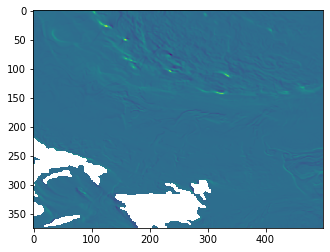

In [16]:
%matplotlib inline
plt.imshow(Zeta.Zeta.values[400,:,:])

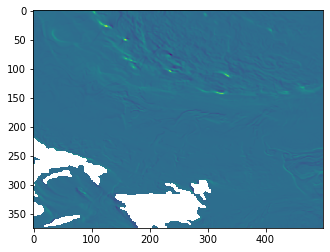

In [15]:
%matplotlib inline
plt.imshow(Zeta_comp.Zeta.values[400,:,:])

In [ ]:
np.array_equal(Zeta_comp.Zeta.values, Zeta.Zeta.values, equal_nan=True)

In [19]:
np.sum(Zeta_comp.Zeta.values[1,:,:] -  Zeta.Zeta.values[1,:,:])

nan